In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle 
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [58]:
data = pd.read_excel('/content/Data_Train.xlsx')

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [59]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [60]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [61]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [62]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [63]:
data.Route=data.Route.str.split('->')
data.Route


0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10683, dtype: object

In [64]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]


In [65]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [66]:

data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]


In [67]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')


In [68]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [69]:
data['Arrival_Time']=data.Arrival_Time.str.split(':')


In [70]:
data['Arriaval_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arriaval_Time_Mins']=data.Time_of_Arrival.str[1]


In [71]:
data.Duration=data.Duration.str.split(' ')

In [72]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]


In [73]:
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]


In [74]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]


In [75]:
data.Additional_Info.unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [76]:
data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     1
Dep_Time                  0
Arrival_Time          10683
Duration                  0
Total_Stops               1
Additional_Info           0
Price                     0
Date                      0
Month                     0
Year                      0
City1                     1
City2                 10683
City3                 10683
City4                 10683
Dep_Time_Hour             0
Dep_Time_Mins             0
Arrival_date           6348
Time_of_Arrival           0
Arriaval_Time_Hour        0
Arriaval_Time_Mins        0
Travel_Hours              0
Travel_Mins            1032
dtype: int64

In [77]:
data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     1
Dep_Time                  0
Arrival_Time          10683
Duration                  0
Total_Stops               1
Additional_Info           0
Price                     0
Date                      0
Month                     0
Year                      0
City1                     1
City2                 10683
City3                 10683
City4                 10683
Dep_Time_Hour             0
Dep_Time_Mins             0
Arrival_date           6348
Time_of_Arrival           0
Arriaval_Time_Hour        0
Arriaval_Time_Mins        0
Travel_Hours              0
Travel_Mins            1032
dtype: int64

In [78]:
data['City3'].fillna('None',inplace=True)
data['Arrival_date'].fillna(data['Date'],inplace=True)
data['Travel_Mins'].fillna(0,inplace=True)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             10683 non-null  object 
 1   Date_of_Journey     10683 non-null  object 
 2   Source              10683 non-null  object 
 3   Destination         10683 non-null  object 
 4   Route               10682 non-null  object 
 5   Dep_Time            10683 non-null  object 
 6   Arrival_Time        0 non-null      float64
 7   Duration            10683 non-null  object 
 8   Total_Stops         10682 non-null  object 
 9   Additional_Info     10683 non-null  object 
 10  Price               10683 non-null  int64  
 11  Date                10683 non-null  object 
 12  Month               10683 non-null  object 
 13  Year                10683 non-null  object 
 14  City1               10682 non-null  object 
 15  City2               0 non-null      float64
 16  City

In [80]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
#data.Arriaval_Time_Hour=data.Arriaval_Time_Hour.astype('int64')
#data.Arriaval_Time_Mins=data.Arriaval_Time_Mins.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')


In [81]:
categorical=['Airline','Source','Destination','Additional_Info','City1',]
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']


In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [83]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City3,City4,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arriaval_Time_Hour,Arriaval_Time_Mins,Travel_Hours,Travel_Mins
0,3,"[24, 03, 2019]",0,5,[BLR → DEL],"[22, 20]",NaN,"[2h, 50m]",4,8,...,0,NaN,22,20,22,01:10,0,1,2,50
1,1,"[1, 05, 2019]",3,0,[CCU → IXR → BBI → BLR],"[05, 50]",NaN,"[7h, 25m]",1,8,...,0,NaN,5,50,1,13:15,1,3,7,25
2,4,"[9, 06, 2019]",2,1,[DEL → LKO → BOM → COK],"[09, 25]",NaN,[19h],1,8,...,0,NaN,9,25,10,04:25,0,4,19,0
3,3,"[12, 05, 2019]",3,0,[CCU → NAG → BLR],"[18, 05]",NaN,"[5h, 25m]",0,8,...,0,NaN,18,5,12,23:30,2,3,5,25
4,3,"[01, 03, 2019]",0,5,[BLR → NAG → DEL],"[16, 50]",NaN,"[4h, 45m]",0,8,...,0,NaN,16,50,1,21:35,2,1,4,45


In [84]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City3,City4,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arriaval_Time_Hour,Arriaval_Time_Mins,Travel_Hours,Travel_Mins
0,3,"[24, 03, 2019]",0,5,[BLR → DEL],"[22, 20]",NaN,"[2h, 50m]",4,8,...,0,NaN,22,20,22,01:10,0,1,2,50
1,1,"[1, 05, 2019]",3,0,[CCU → IXR → BBI → BLR],"[05, 50]",NaN,"[7h, 25m]",1,8,...,0,NaN,5,50,1,13:15,1,3,7,25
2,4,"[9, 06, 2019]",2,1,[DEL → LKO → BOM → COK],"[09, 25]",NaN,[19h],1,8,...,0,NaN,9,25,10,04:25,0,4,19,0
3,3,"[12, 05, 2019]",3,0,[CCU → NAG → BLR],"[18, 05]",NaN,"[5h, 25m]",0,8,...,0,NaN,18,5,12,23:30,2,3,5,25
4,3,"[01, 03, 2019]",0,5,[BLR → NAG → DEL],"[16, 50]",NaN,"[4h, 45m]",0,8,...,0,NaN,16,50,1,21:35,2,1,4,45


In [85]:
data = data[['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Price' ]]

In [86]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,3897
1,1,3,0,1,5,2019,5,50,7662
2,4,2,1,9,6,2019,9,25,13882
3,3,3,0,12,5,2019,18,5,6218
4,3,0,5,1,3,2019,16,50,13302


In [87]:
data.describe()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,13.508378,4.708602,2019.0,12.490686,24.411214,9087.064121
std,2.352155,1.177221,1.474782,8.479277,1.164357,0.0,5.748650,18.767980,4611.359167
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,8.000000,5.000000,5277.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,11.000000,25.000000,8372.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,18.000000,40.000000,12373.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,23.000000,55.000000,79512.000000


KeyError: ignored

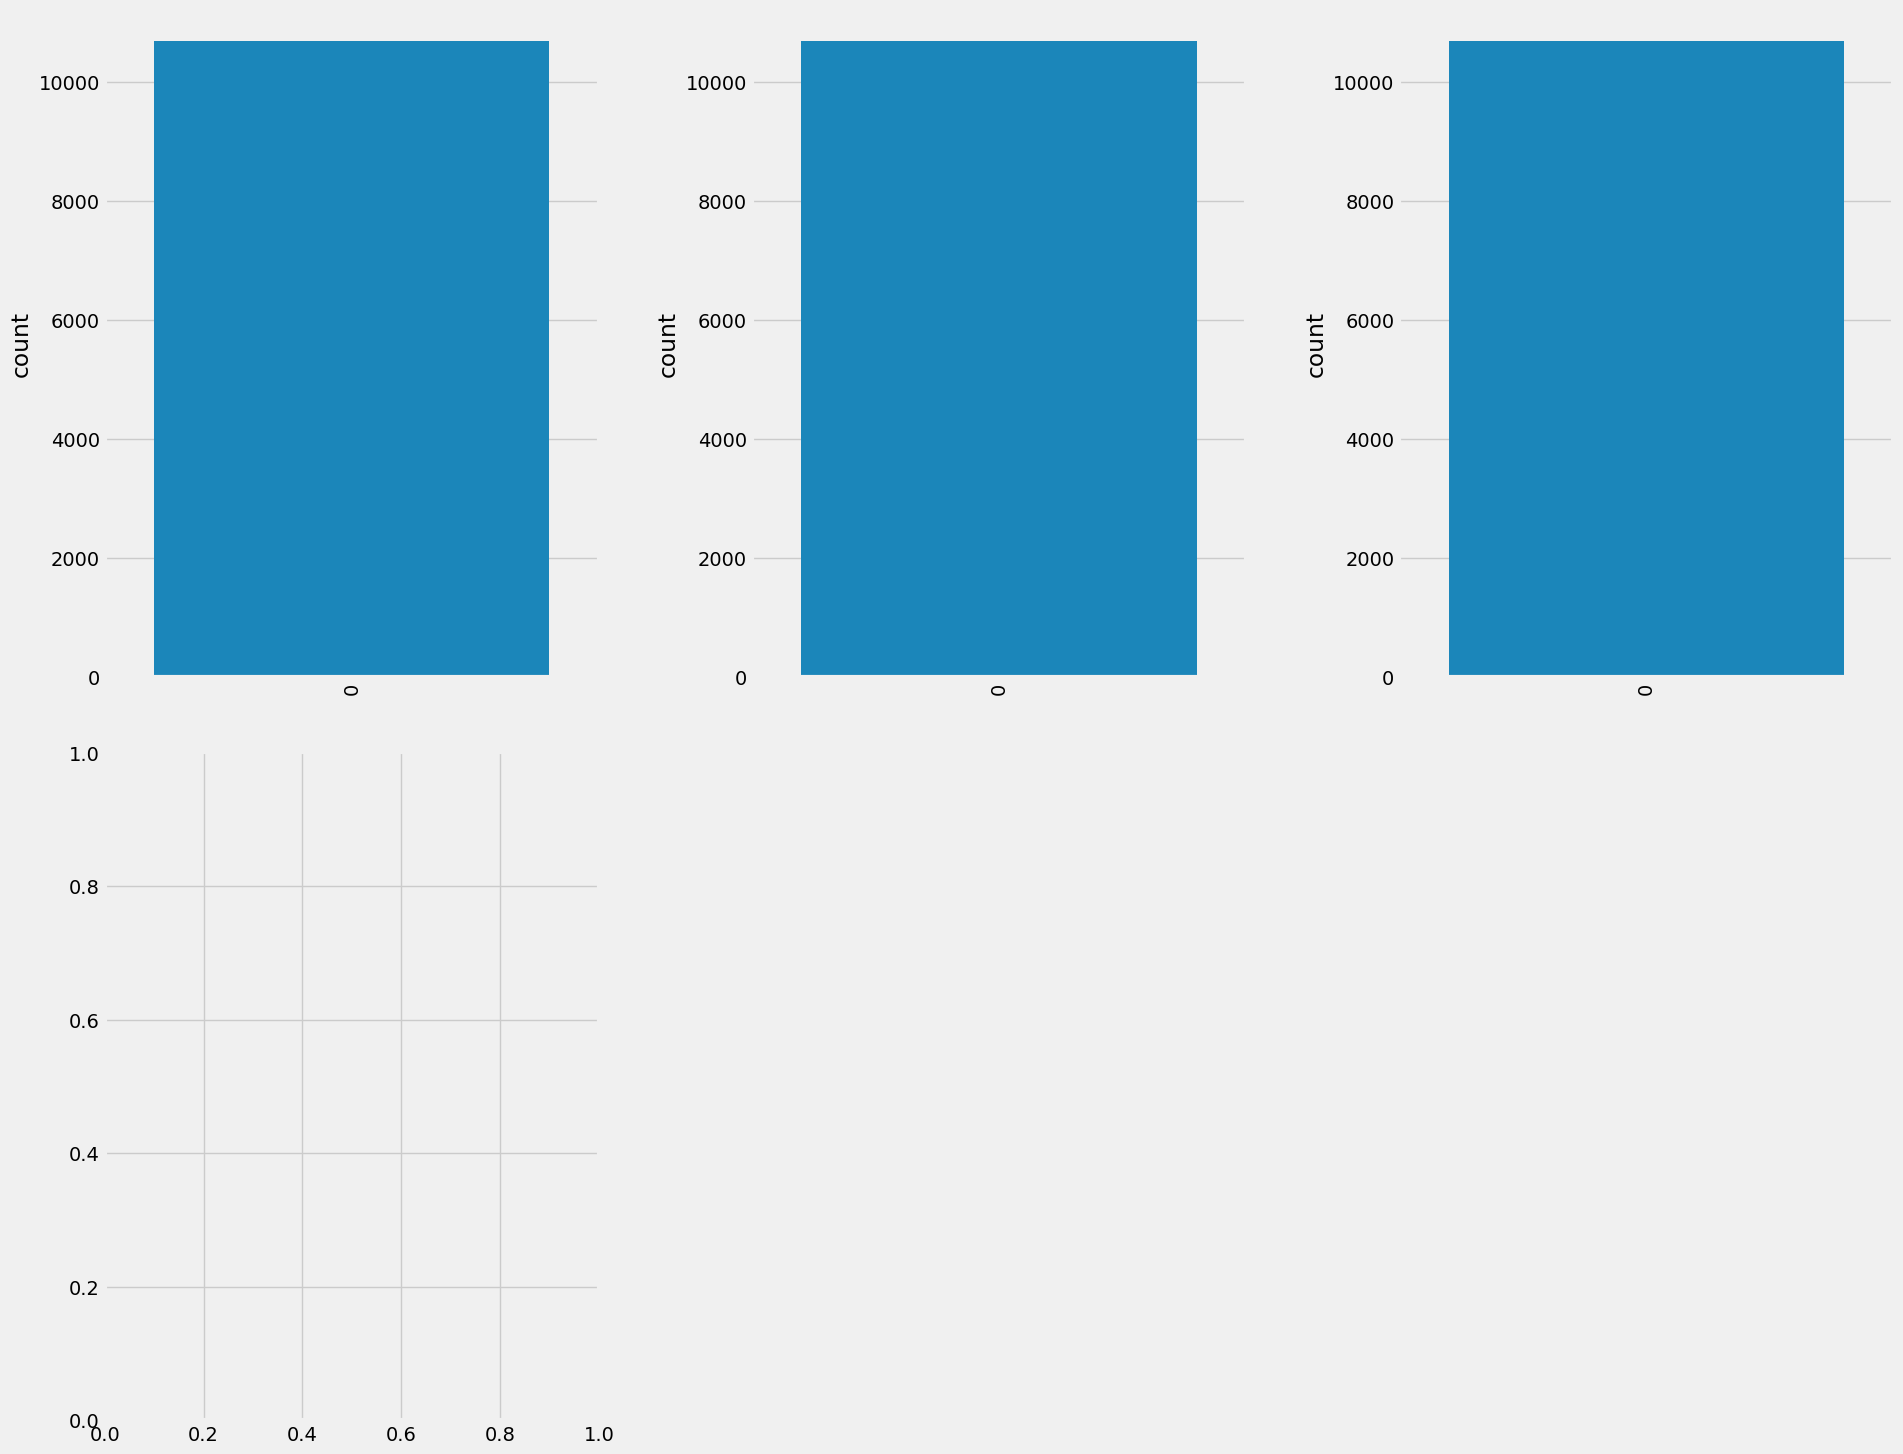

In [106]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
  plt.subplot(6,3,c)
  sns.countplot(data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
plt.show()

<Figure size 1500x800 with 0 Axes>

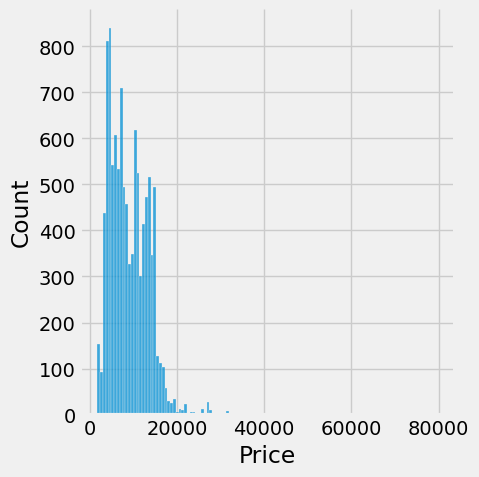

In [89]:
plt.figure(figsize=(15,8))
sns.displot(data.Price)


<Axes: >

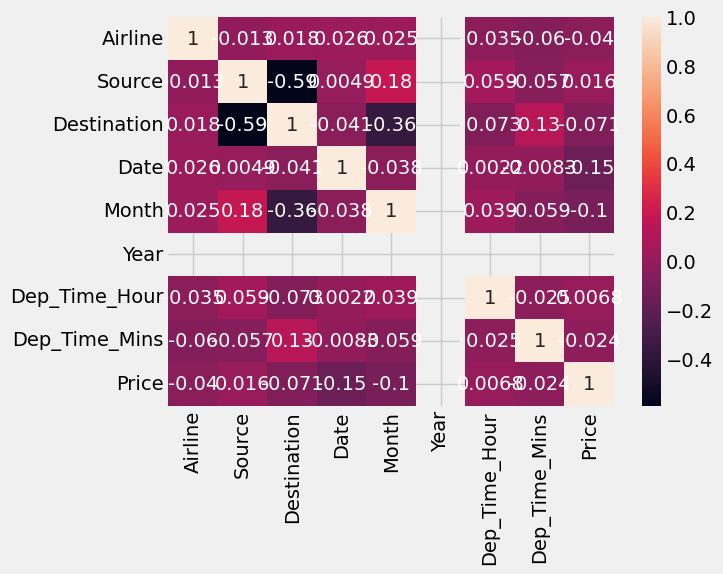

In [90]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

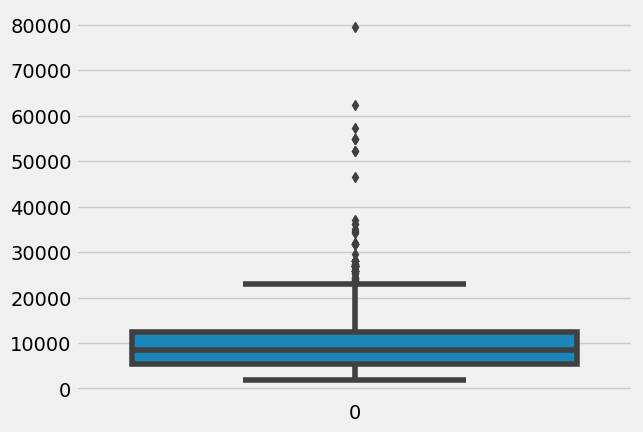

In [91]:

import seaborn as sns
sns.boxplot(data['Price'])

In [92]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)


In [93]:
x.head()


,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins
0,3,0,5,24,3,2019,22,20
1,1,3,0,1,5,2019,5,50
2,4,2,1,9,6,2019,9,25
3,3,3,0,12,5,2019,18,5
4,3,0,5,1,3,2019,16,50


In [94]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<Axes: >

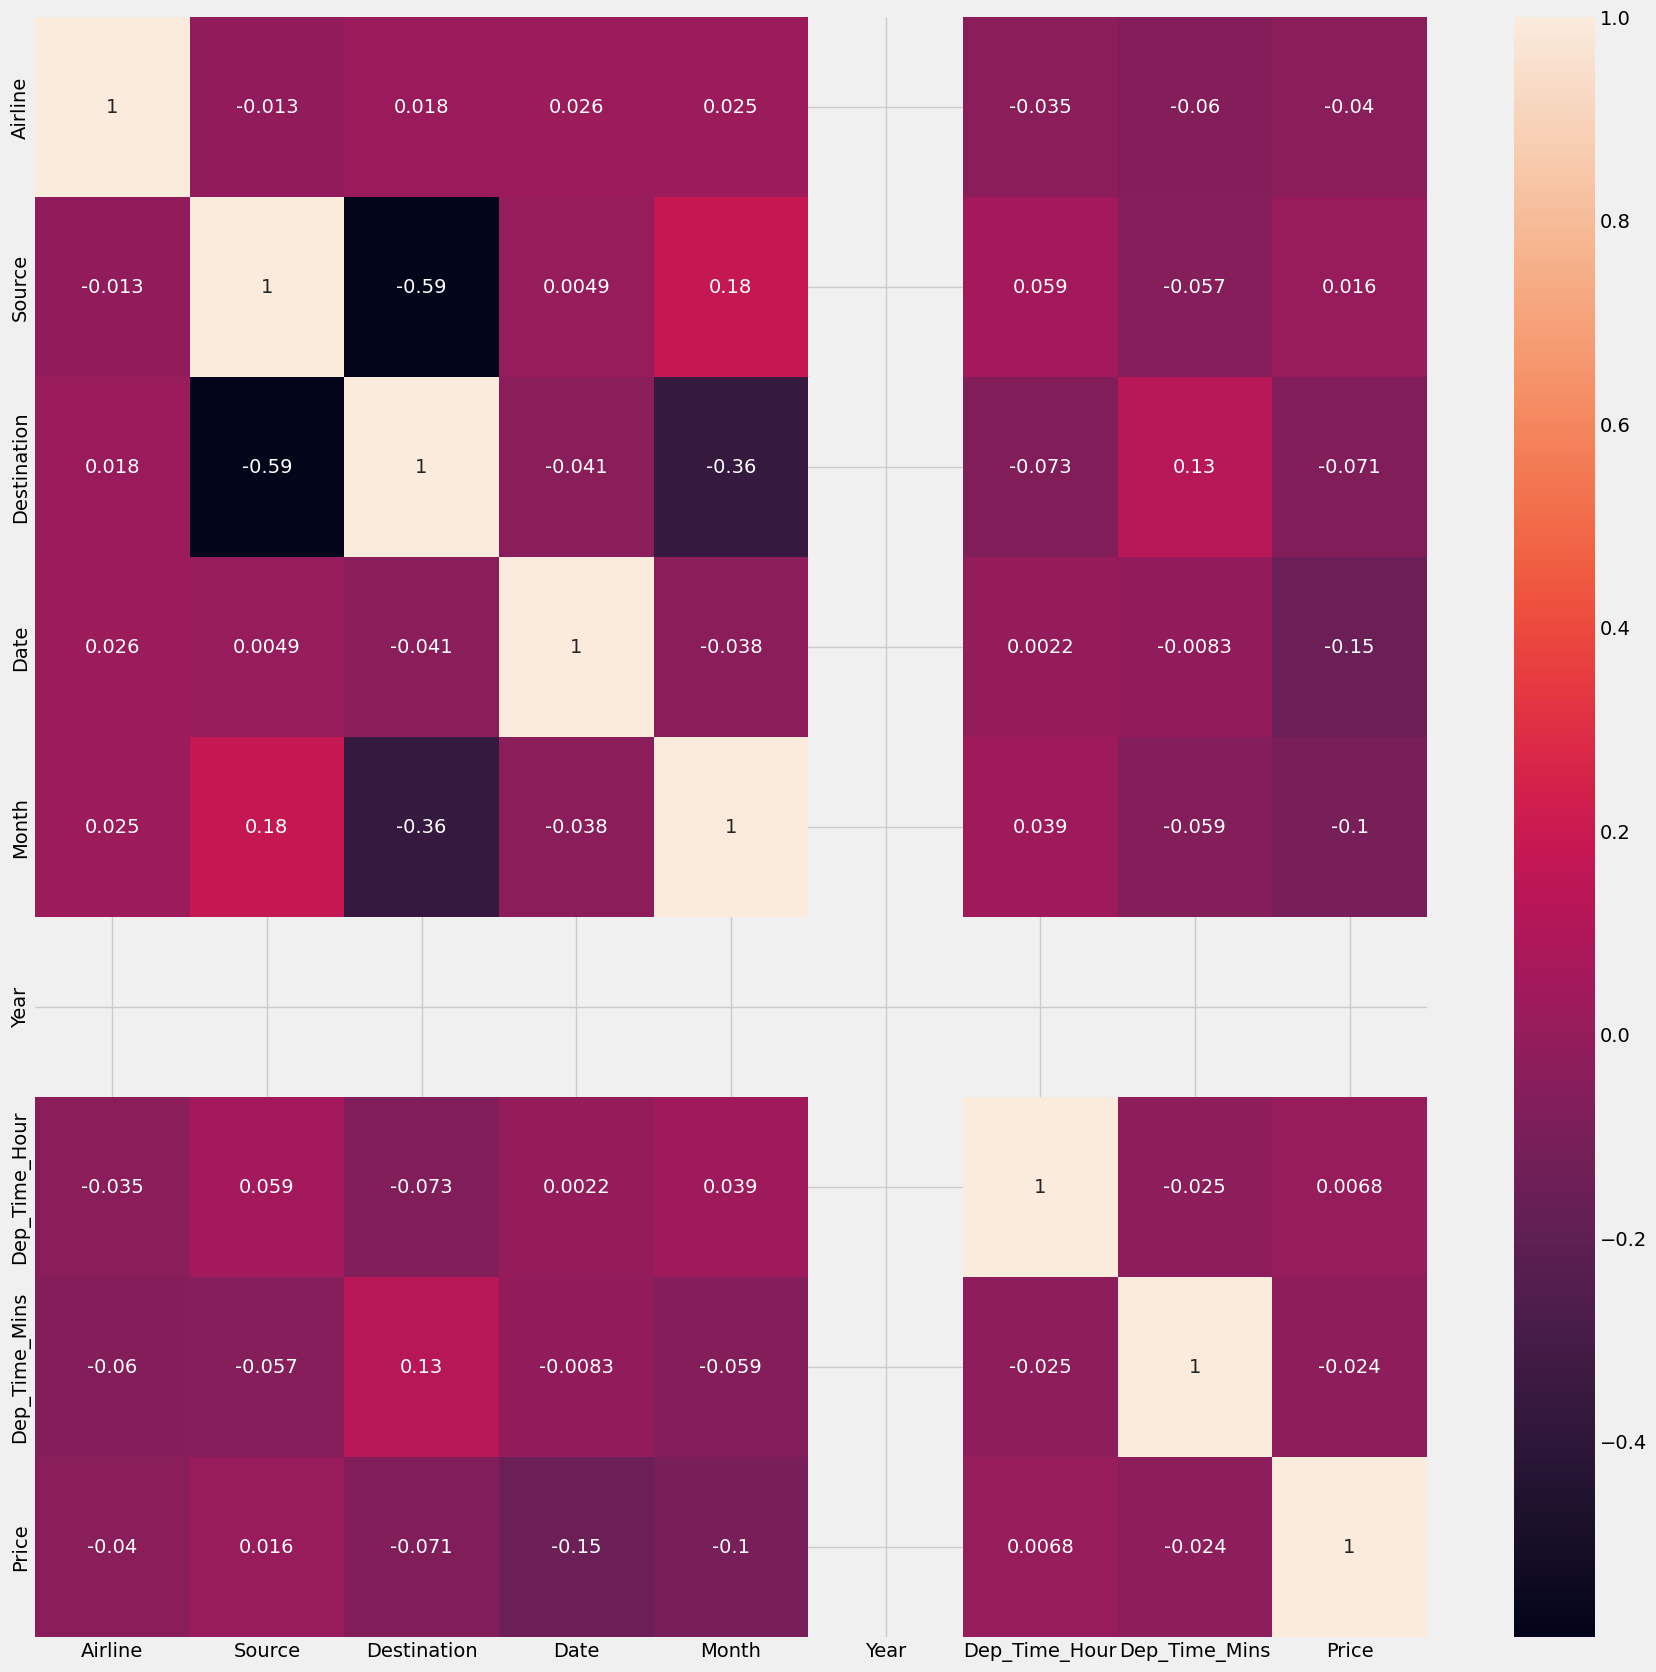

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)


In [102]:
y=data['Price']
x=data.drop(coloumns=['Price'],axis=1)


TypeError: ignored

In [97]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [98]:
#x_scaled = ss.fit_transform(x)

In [105]:
x_scaled =pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()


NameError: ignored

In [103]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins
8990,4,4,3,12,3,2019,6,30
3684,4,2,1,9,5,2019,11,30
1034,8,2,1,24,4,2019,15,45
3909,6,2,1,21,3,2019,12,50
3088,1,2,1,24,6,2019,17,15
